* This notebook was made to see the particle movement which reflect surface currents between deepened river treatment simulation and the nowcast one

In [1]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from salishsea_tools import tidetools
from salishsea_tools import (nc_tools,viz_tools)
import matplotlib.cm as cm
from matplotlib import animation
from numpy import *
from pylab import *
%matplotlib inline

load bathymetry

In [2]:
grid1 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc','r')
grid2 = nc.Dataset('/ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc','r')

surface particles

In [3]:
f1 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane\
/result/14_NW_deepen/ariane_trajectories_qualitative.nc','r')
f2 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane\
/result/default/ariane_trajectories_qualitative.nc','r')

In [4]:
def compare_tracks_safig(f1, f2, grid1, grid2, i):
    """This function was used to make a plot of 
        number i particle tracks in the same figure.
        f1 & f2 are trajetory nc files respectively, grid1
        and grid2 are bathymetry file respectively,
        return the figure"""
    f = [f1, f2]
    grid = [grid1, grid2]
    n = np.arange(2)
    colors = cm.rainbow(np.linspace(0, 1, len(n)))
    legd = ['new', 'previous']
    fig, axs = plt.subplots(1,1,figsize=(10,7))
    for ff, gridd, c, le in zip(f, grid, colors, legd): 
        lont = ff.variables['traj_lon']
        latt = ff.variables['traj_lat']
        dept = ff.variables['traj_depth']
        xs = ff.variables['init_x']
        ys = ff.variables['init_y']
        t = ff.variables['traj_time']
        axs.scatter(lont[1:,i],latt[1:,i],color=c, label = le)
        axs.scatter(lont[0,i],latt[0,i],color='0.30',marker='s')
        viz_tools.plot_coastline(axs,gridd,coords='map')
        axs.set_xlim([-123.8,-122.8])
        axs.set_ylim([48.5,49.5])
        axs.set_xlabel('longitude')
        axs.set_ylabel('latitude')
        axs.set_title('particle comparison')
        axs.legend(loc = 1, fontsize = 15)
        
    return fig

In [5]:
def compare_tracks_more(f1,f2,f3,grid1,grid2,i):
    """This function was made to compare particle trajectories
        between nowcasts & deepened case and nowcasts with same 
        TS initial & deepended case
        f1: deepened case
        f2: nowcasts 
        f3: nowcasts with same TS for deepend case
        return the figure"""
    fig, axs = plt.subplots(1,2,figsize=(22,10))
    n = np.arange(2)
    #grid = [grid1, grid2]
    colors = cm.rainbow(np.linspace(0, 1, len(n)))
    legd = ['new', 'previous']
    ## for first comparison
    f = [f1,f2]
    for ff, le, c in zip(f, legd, colors):
        lont = ff.variables['traj_lon']
        latt = ff.variables['traj_lat']
        dept = ff.variables['traj_depth']
        xs = ff.variables['init_x']
        ys = ff.variables['init_y']
        t = ff.variables['traj_time']
        axs[0].scatter(lont[1:,i],latt[1:,i],color=c, label = le)
        axs[0].scatter(lont[0,i],latt[0,i],color='0.30',marker='s')
        axs[0].legend(loc = 2)
        viz_tools.plot_land_mask(axs[0], grid1, coords='map')
        viz_tools.plot_coastline(axs[0],grid1,coords='map', isobath=5)
        axs[0].set_title('particle comparison between deepened case and nowcasts')
        axs[0].set_xlim([-123.8,-122.8])
        axs[0].set_ylim([48.5,49.4])
        axs[0].set_xlabel('longitude')
        axs[0].set_ylabel('latitude')
    ## for second comparison
    f = [f1,f3]
    for ff, le, c in zip(f, legd,colors):
        lont = ff.variables['traj_lon']
        latt = ff.variables['traj_lat']
        dept = ff.variables['traj_depth']
        xs = ff.variables['init_x']
        ys = ff.variables['init_y']
        t = ff.variables['traj_time']
        axs[1].scatter(lont[1:,i],latt[1:,i],color=c, label = le)
        axs[1].scatter(lont[0,i],latt[0,i],color='0.30',marker='s')
        axs[1].legend(loc = 2)
        viz_tools.plot_land_mask(axs[1], grid1, coords='map')
        viz_tools.plot_coastline(axs[1],grid1,coords='map', isobath=5)
        axs[1].set_title('particle comparison between deepened case and nowcasts with same TS initial condition')
        axs[1].set_xlim([-123.8,-122.8])
        axs[1].set_ylim([48.5,49.4])
        axs[1].set_xlabel('longitude')
        axs[1].set_ylabel('latitude')
    return fig

plot in the same figure to see the difference

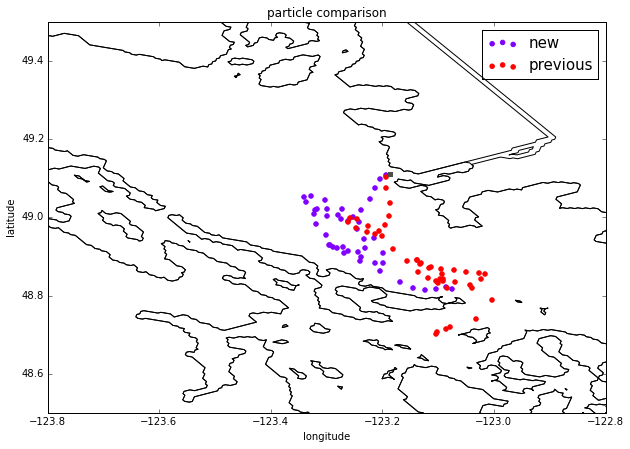

In [6]:
## grid cell[310, 420] in python
fig = compare_tracks_safig(f1,f2, grid1,grid2, 0)

In [7]:
fig.savefig('ariane2.png')

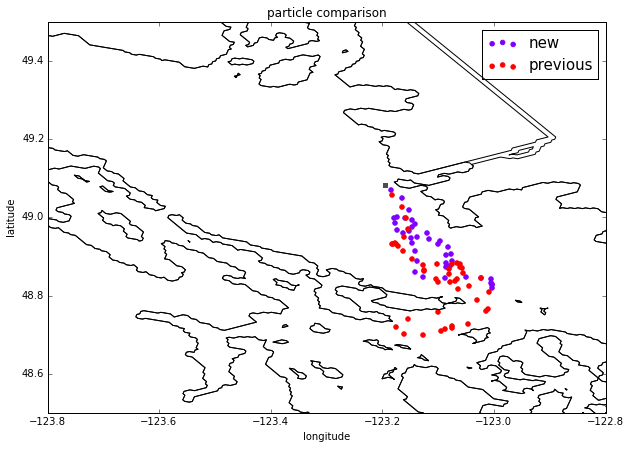

In [8]:
## grid cell[305, 415] in python
fig = compare_tracks_safig(f1,f2, grid1,grid2, 1)

Some other particles at different locations in the plume

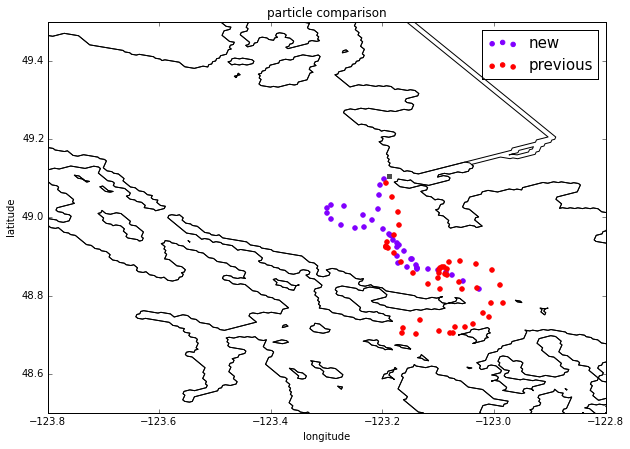

In [9]:
## grid point[309, 419] 
fig = compare_tracks_safig(f1,f2, grid1,grid2, 2)

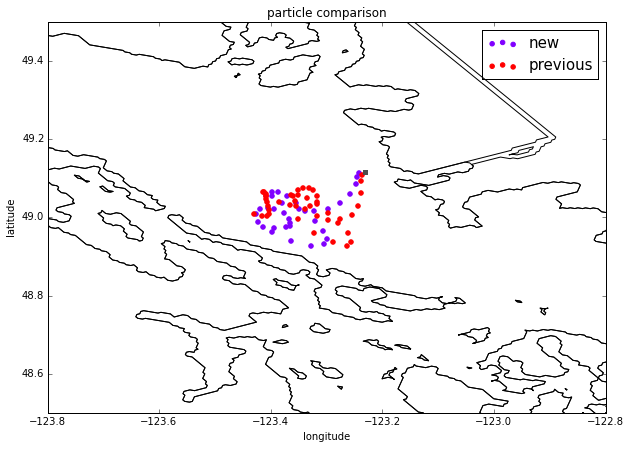

In [10]:
## grid point [304, 424]
fig = compare_tracks_safig(f1,f2, grid1,grid2, 3)

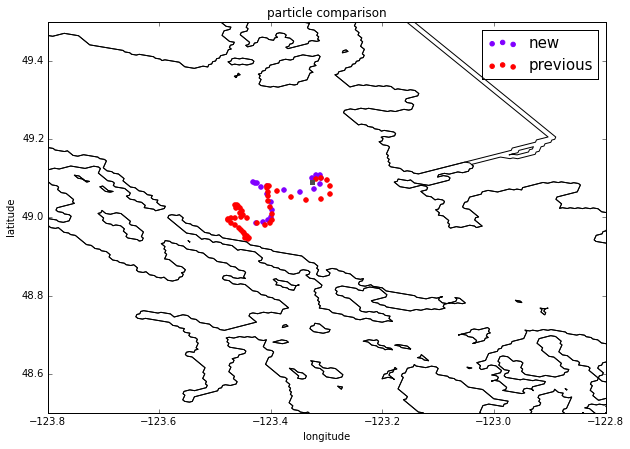

In [11]:
## grid point[287, 426]
fig = compare_tracks_safig(f1,f2, grid1,grid2, 4)

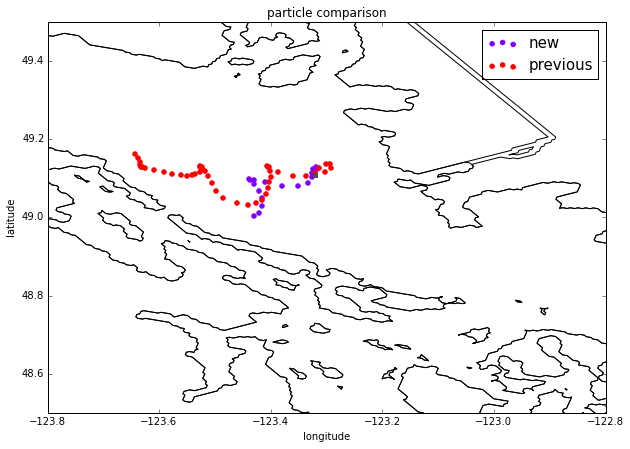

In [12]:
## grid point[290, 429] near Jetty
fig = compare_tracks_safig(f1,f2, grid1,grid2, 5)

* Yes, the cross strait velocity is much more obvious than nowcasts, especially for location north close to the river mouth, the first particle. Will do the comparisons below with results the same with nowcasts except TS conditions.

In [13]:
f1 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane\
/result/14_NW_deepen/ariane_trajectories_qualitative.nc','r')
f2 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/\
result/14_nowcast/ariane_trajectories_qualitative.nc','r')

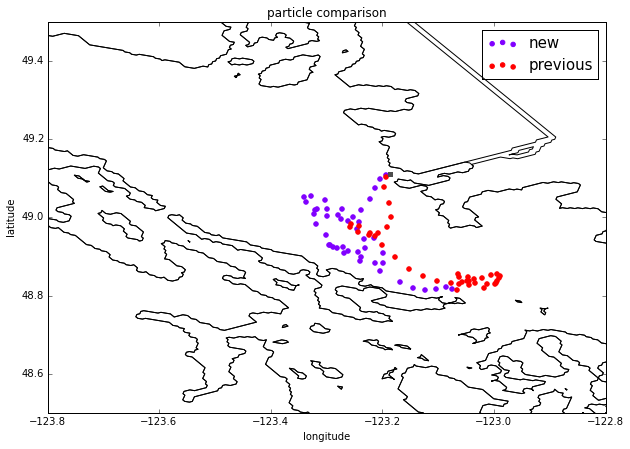

In [14]:
## grid cell[310, 420] in python
fig = compare_tracks_safig(f1,f2, grid1,grid2, 0)

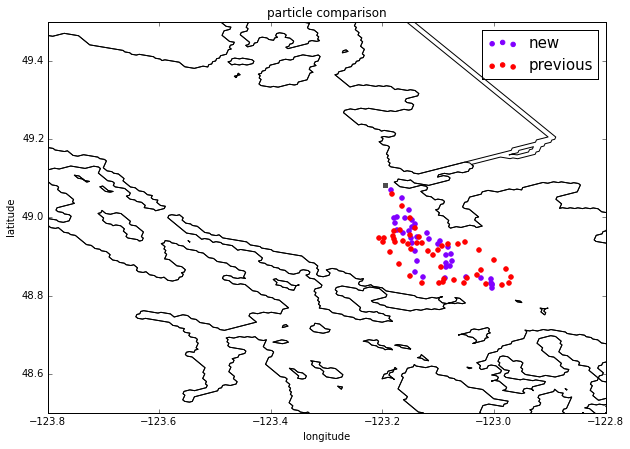

In [15]:
## grid cell[305, 415] in python
fig = compare_tracks_safig(f1,f2, grid1,grid2, 1)

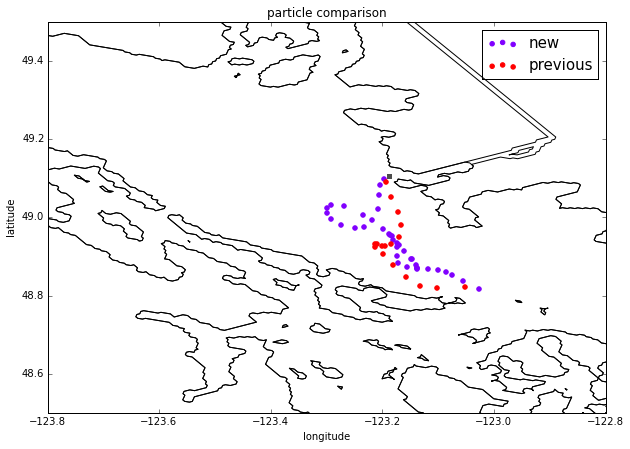

In [16]:
## grid point[309, 419] 
fig = compare_tracks_safig(f1,f2, grid1,grid2, 2)

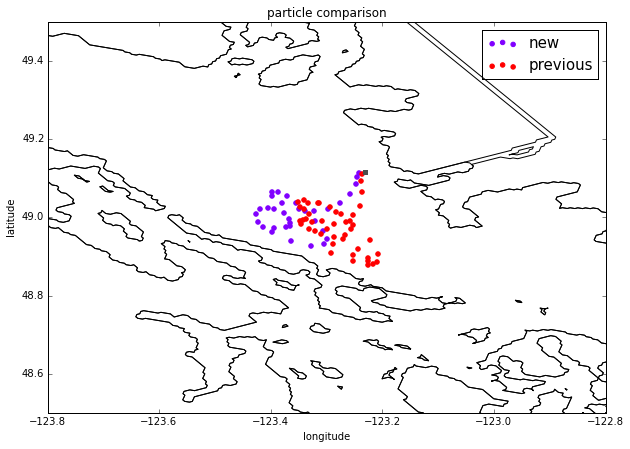

In [17]:
## grid point [304, 424]
fig = compare_tracks_safig(f1,f2, grid1,grid2, 3)

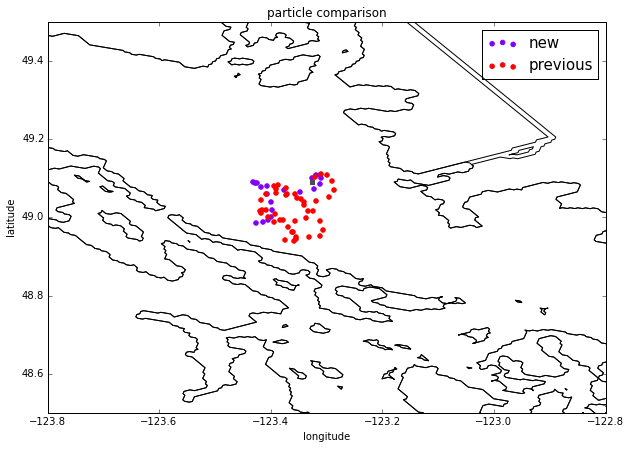

In [18]:
## grid point[287, 426]
fig = compare_tracks_safig(f1,f2, grid1,grid2, 4)

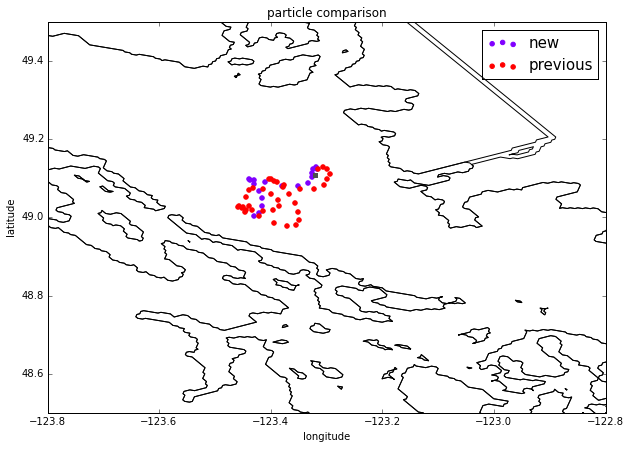

In [19]:
## grid point[290, 429] near Jetty
fig = compare_tracks_safig(f1,f2, grid1,grid2, 5)

* Combine the comparisons both

In [20]:
f1 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane\
/result/14_NW_deepen/ariane_trajectories_qualitative.nc','r')
f2 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane\
/result/default/ariane_trajectories_qualitative.nc','r')
f3 = nc.Dataset('/ocean/jieliu/research/meopar/Ariane/\
result/14_nowcast/ariane_trajectories_qualitative.nc','r')

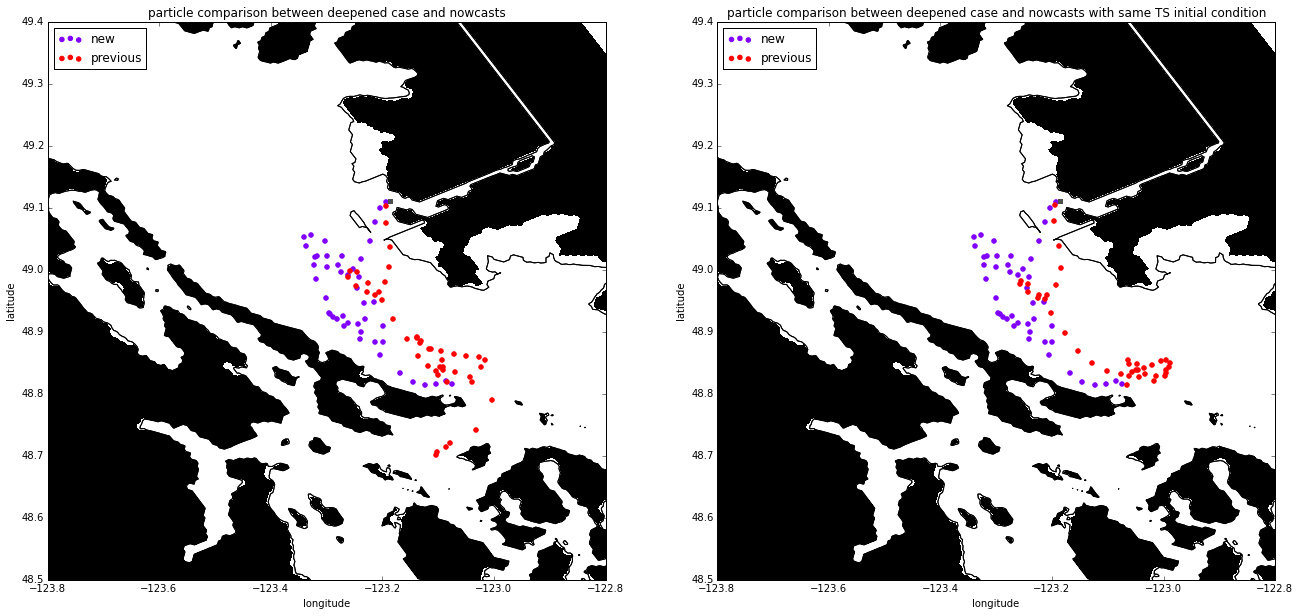

In [21]:
fig = compare_tracks_more(f1,f2,f3, grid1,grid2, 0)

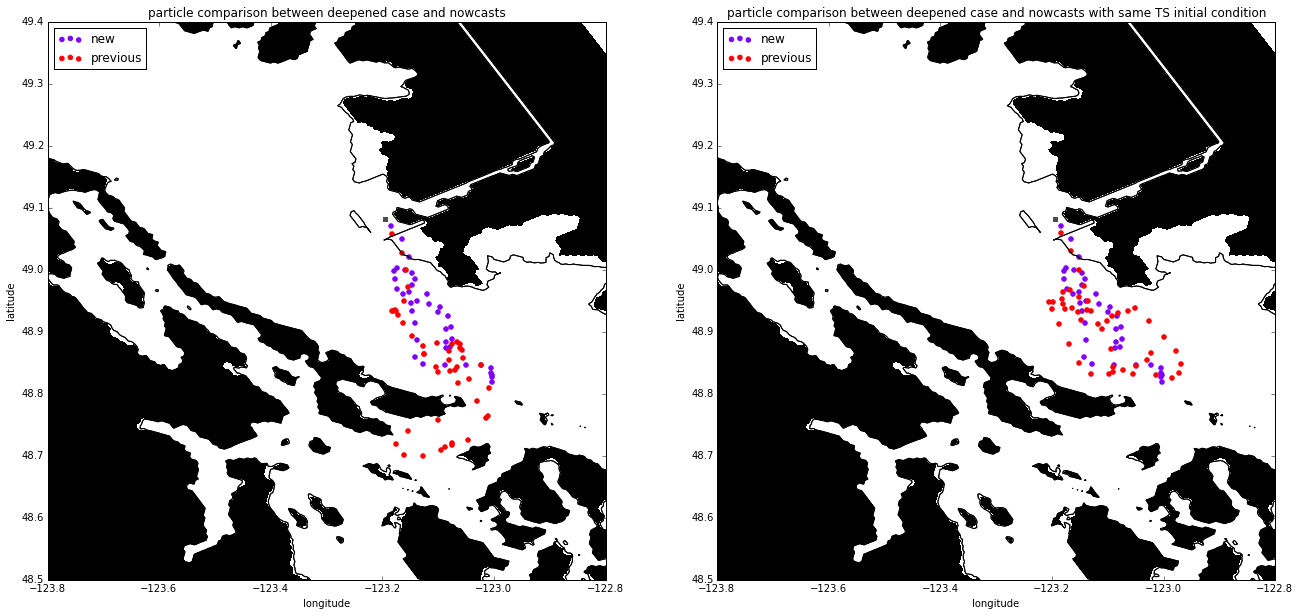

In [22]:
fig = compare_tracks_more(f1,f2,f3, grid1,grid2, 1)

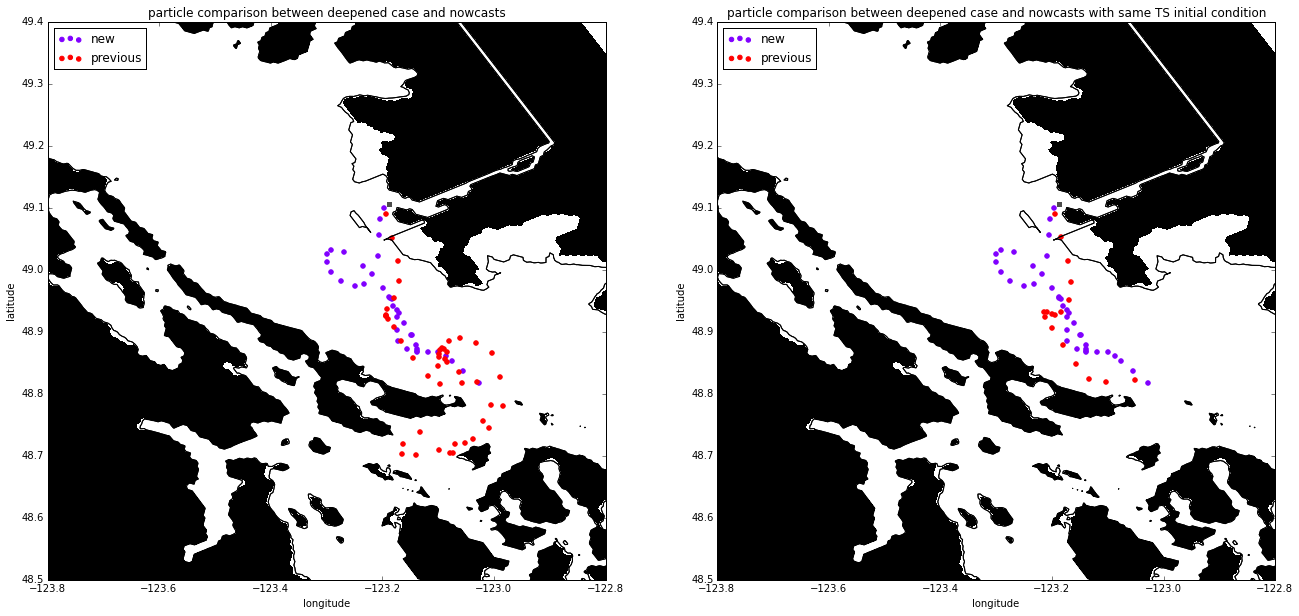

In [23]:
fig = compare_tracks_more(f1,f2,f3, grid1,grid2, 2)

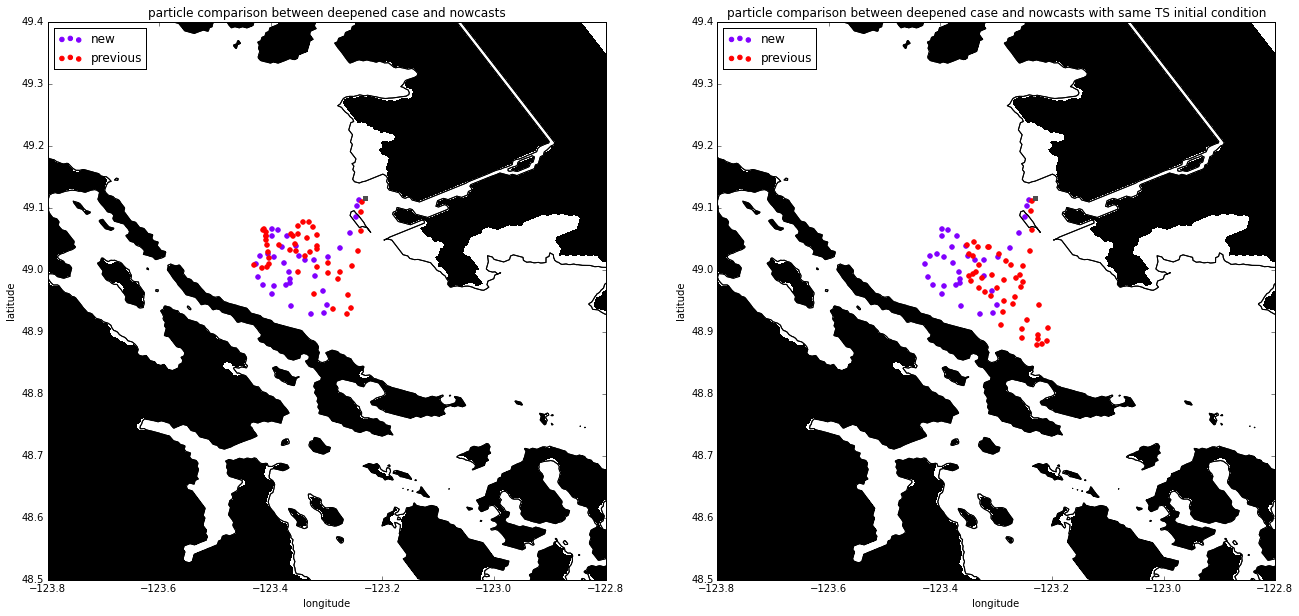

In [24]:
fig = compare_tracks_more(f1,f2,f3, grid1,grid2, 3)

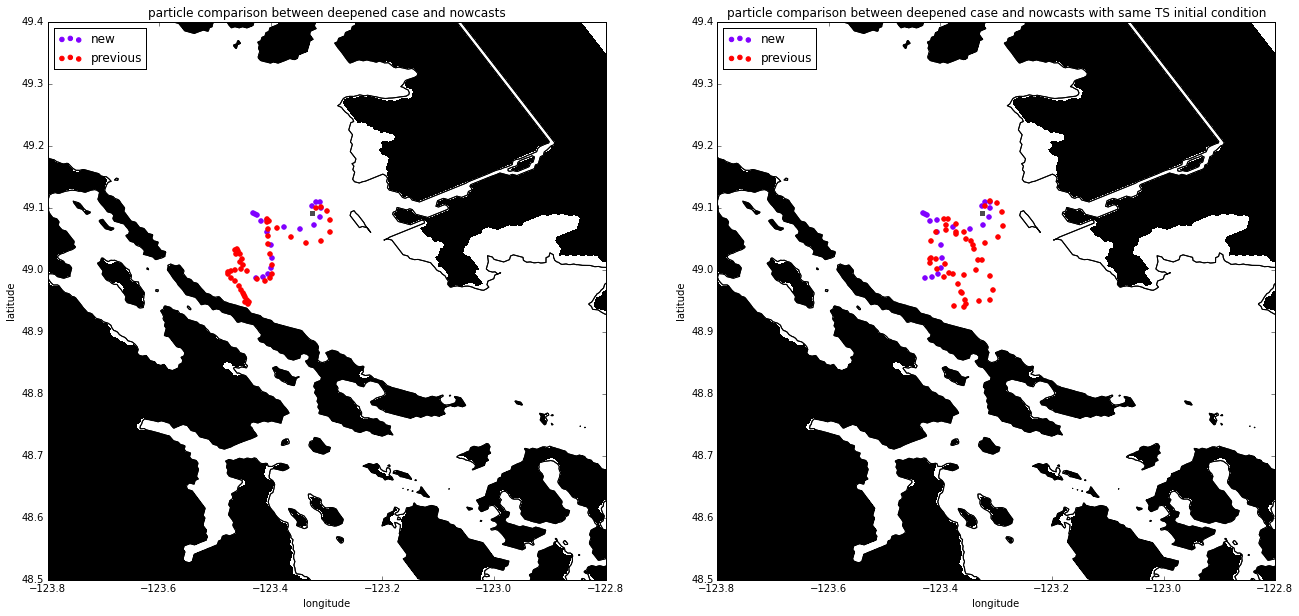

In [25]:
fig = compare_tracks_more(f1,f2,f3, grid1,grid2, 4)

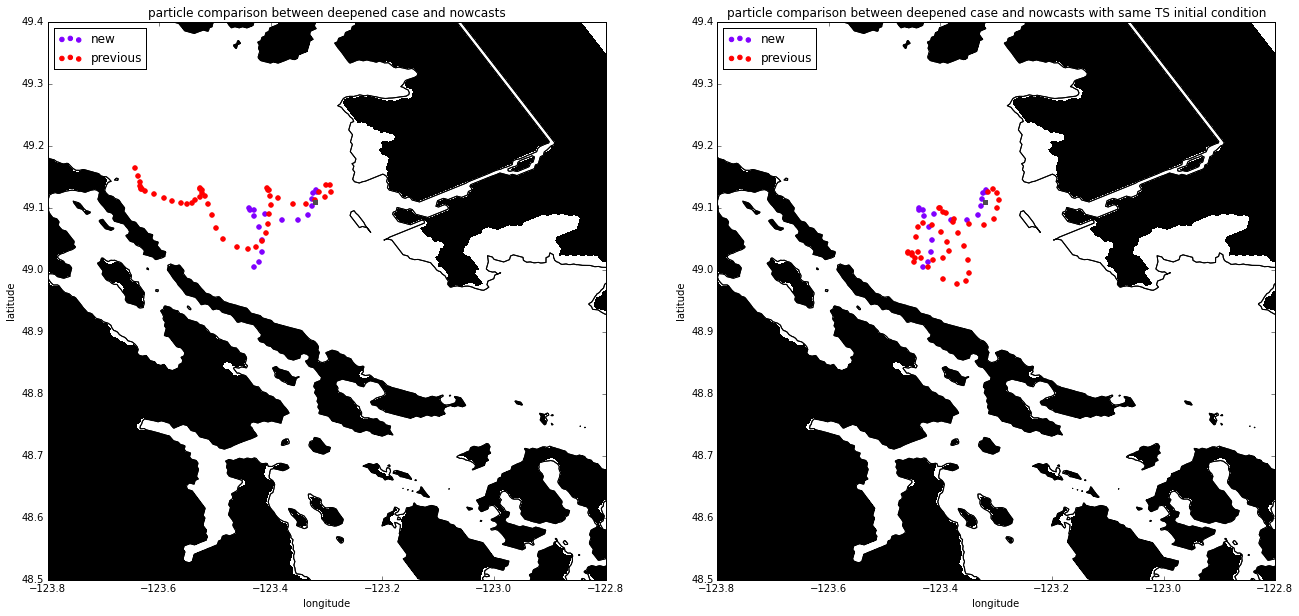

In [26]:
fig = compare_tracks_more(f1,f2,f3, grid1,grid2, 5)

* In summary, extended river channel with deepened bathymetry did increase cross channel velocity. Figure on the right shows the currents that are caused by bathymetry difference, which they follow nearly the same trend except for extension cross the channel.
* The other difference from new channel and nowcast is that nowcasts results could go further longer way than new river channel, the differences are river discharge (climatology/daily) and TS initial condition(start from 0/restart file), or some other factors cause this problem?